## Importing Required Modules For Processing And Visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Information

In [17]:
df = pd.read_csv("TCS1.csv")

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [19]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [21]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [22]:
#This dataframe contains 7 columns
#Date-- Date includes day and month and year
#open -- open value of the TCS stock price on particular day
#High -- high price value of TCS on particular day
#LOW -- Low Price Value Of ITC on particular day
#Close --Stock Price of TCS After Closing The Stock Market
#Volume -- Volume of TCS means sum of buy's and shares
#Adjclose --Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions

## Data Preprocessing

In [23]:
df2 = df.copy()
df2.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

### Dealing with Null Values

In [24]:
# Taking Mean for null values
cols = df.columns
for i in range(1, len(cols)):
    df2[cols[i]] = df2[cols[i]].fillna(df2[cols[i]].mean())
print("Done...")

Done...


In [25]:
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Converting the Date Object to DateTime Series

In [26]:
df2["Date"] = pd.to_datetime(df2["Date"])

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4494 non-null   datetime64[ns]
 1   Open       4494 non-null   float64       
 2   High       4494 non-null   float64       
 3   Low        4494 non-null   float64       
 4   Close      4494 non-null   float64       
 5   Adj Close  4494 non-null   float64       
 6   Volume     4494 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 245.9 KB


In [28]:
type(df2["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

## Visualization

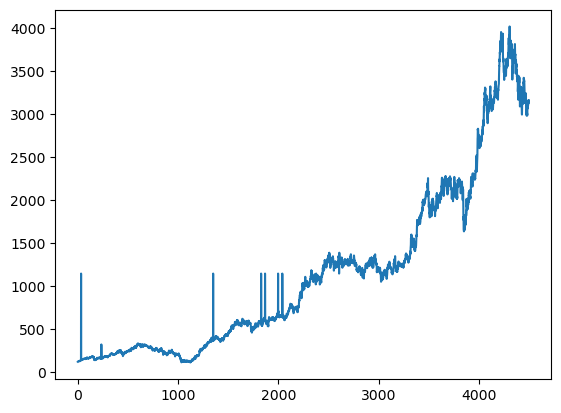

In [43]:
# Stock Closing
plt.plot(df2["Close"])

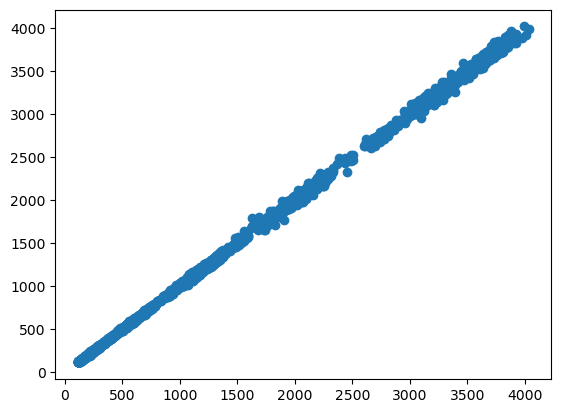

In [44]:
# Relation of Open And Close
plt.scatter(df2["Open"], df2["Close"])

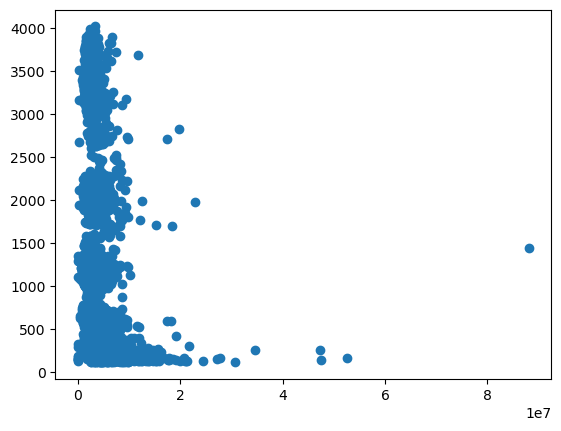

In [45]:
# Relation of Volume And Close
plt.scatter(df2["Volume"], df2["Close"])

C:\Users\Arbaz Khan\AppData\Local\Temp\ipykernel_7348\1569484951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<Axes: >

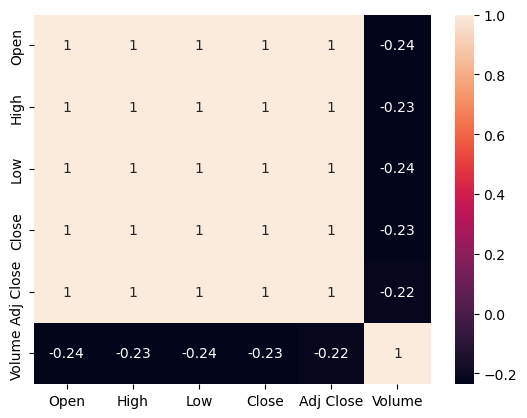

In [46]:
# Heatmap of corealtions
sns.heatmap(df2.corr(), annot=True)

## Saving The Processed Data Frame

In [47]:
df2.to_csv("processed_stock.csv", index=False)